<a href="https://colab.research.google.com/github/aworklab/BicycleRoadKorea/blob/main/ex_20230505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [25]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'ab_experiment.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 'app_wau.csv',
 'match_result_test.csv',
 'lead_conversion.csv',
 'mall_customers.csv',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 '1_order_payments_dataset.csv',
 'cookie_cats.csv',
 'sales_data_with_stores.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'groceries.csv',
 'sample_data']

In [31]:
df = pd.read_csv('sample-sales-data.csv')
df['date'] = df['sales_date'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df = df[['store', 'product','week','date','sales_qty', 'sales_rev']].rename(columns = {'sales_qty':'qty', 'sales_rev':'rev'})
df['price'] = df['rev']/df['qty']
df.head()

,store,product,week,date,qty,rev,price
0,1,29790057,2020-03-16,2020-03-19,4,42.0,10.5
1,2,29790057,2020-03-16,2020-03-18,1,10.5,10.5
2,3,29790057,2020-03-16,2020-03-16,8,84.0,10.5
3,4,29790057,2020-03-16,2020-03-16,15,157.5,10.5
4,5,29790057,2020-03-16,2020-03-17,28,294.0,10.5


In [10]:
df[['product']].value_counts().reset_index()

,product,0
0,30560809,1663
1,30619962,1390
2,30560805,1314
3,30611495,1309
4,30589805,1246
...,...,...
871,30539998,1
872,30591516,1
873,30719872,1
874,30539909,1


In [11]:
df['product'].agg(['min','max'])

min    29027305
max    46022024
Name: product, dtype: int64

In [12]:
df['date'].agg(['min','max'])

min   2019-12-30
max   2021-01-03
Name: date, dtype: datetime64[ns]

In [32]:
df['code'] = [str(a)[:2] for a in df['product']]
df.head()

,store,product,week,date,qty,rev,price,code
0,1,29790057,2020-03-16,2020-03-19,4,42.0,10.5,29
1,2,29790057,2020-03-16,2020-03-18,1,10.5,10.5,29
2,3,29790057,2020-03-16,2020-03-16,8,84.0,10.5,29
3,4,29790057,2020-03-16,2020-03-16,15,157.5,10.5,29
4,5,29790057,2020-03-16,2020-03-17,28,294.0,10.5,29


In [17]:
df['code'].value_counts().reset_index()

,index,code
0,30,171976
1,29,50573
2,46,745
3,31,719
4,34,216


/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


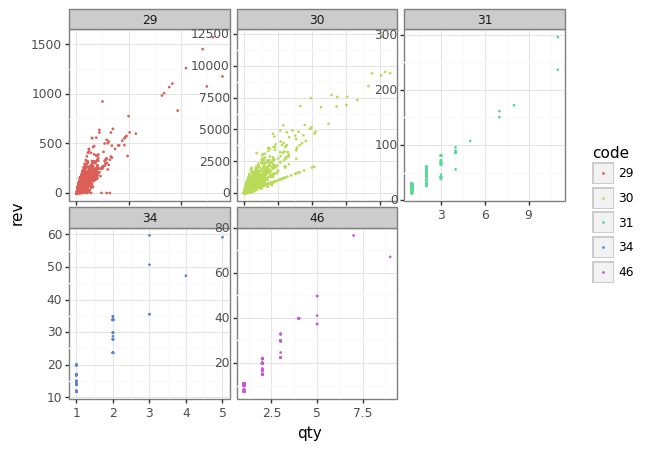

<ggplot: (8762512585735)>

In [21]:
(
    ggplot(df, aes('qty','rev', color = 'code')) +
    gg.geom_point(size = 0.1) +
    gg.facet_wrap('~code', scales = 'free') +
    gg.theme_bw()
)

In [23]:
cnt_rev = df.groupby(['week','code'])[['qty','rev']].sum().reset_index()
cnt_rev.head()

,week,code,qty,rev
0,2019-12-30,29,1194,14276.57
1,2019-12-30,30,6870,142590.85
2,2019-12-30,31,27,585.20
3,2019-12-30,34,3,50.70
4,2019-12-30,46,12,109.44


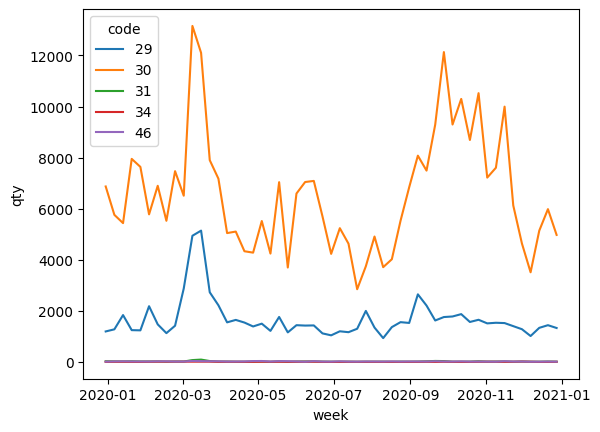

In [26]:
sns.lineplot(data = cnt_rev, x = 'week', y = 'qty', hue = 'code')
plt.show()

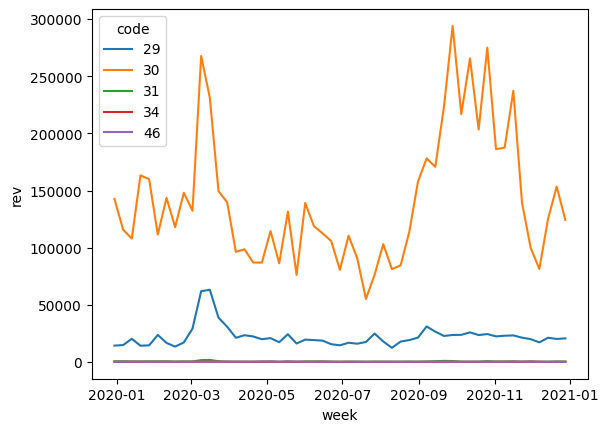

In [27]:
sns.lineplot(data = cnt_rev, x = 'week', y = 'rev', hue = 'code')
plt.show()

In [52]:
cnt_q = df.groupby(['code'])['price'].quantile([.25, .5, .75, .95]).reset_index()
cnt_q = pd.pivot_table(cnt_q, index = 'code', columns = 'level_1', values = 'price').reset_index()
cnt_q

level_1,code,0.25,0.5,0.75,0.95
0,29,8.50,11.95,16.75,30.90
1,30,11.75,17.17,27.67,48.25
2,31,21.52,23.96,26.90,29.95
3,34,13.90,16.90,16.90,19.90
4,46,9.95,9.95,9.95,10.95


In [54]:
cnt_q = df.groupby(['code'])['price'].quantile([.25, .5, .75, .95]).reset_index()
cnt_q.head()

,code,level_1,price
0,29,0.25,8.50
1,29,0.50,11.95
2,29,0.75,16.75
3,29,0.95,30.90
4,30,0.25,11.75


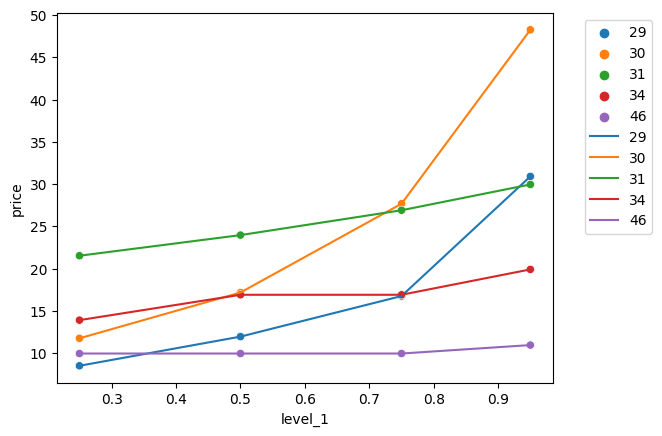

In [60]:
sns.scatterplot(data = cnt_q, x = 'level_1', y = 'price', hue = 'code')
sns.lineplot(data = cnt_q, x = 'level_1', y = 'price', hue = 'code')
plt.legend(bbox_to_anchor = [1.05,1])
plt.show()

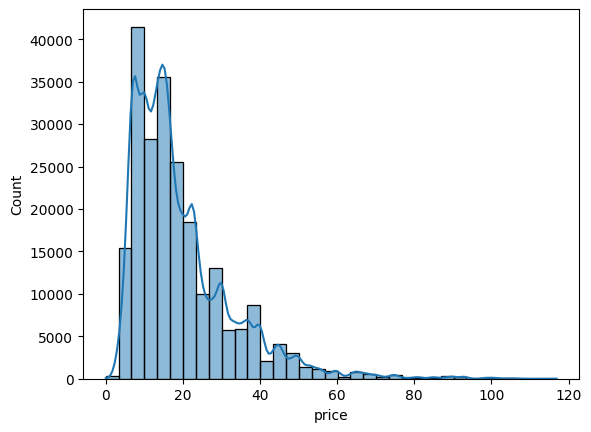

In [61]:
sns.histplot(data = df, x = 'price', kde = True, bins = 35)
plt.show()

In [71]:
cuts = [0, 5, 10, 20, 40, 60, 120]
labels = [f'{a:03d}' for a in [5, 10, 20, 40, 60, 120]]
df['cat'] = pd.cut(df['price'], cuts, labels = labels)
df.head()

,store,product,week,date,qty,rev,price,code,cat
0,1,29790057,2020-03-16,2020-03-19,4,42.0,10.5,29,020
1,2,29790057,2020-03-16,2020-03-18,1,10.5,10.5,29,020
2,3,29790057,2020-03-16,2020-03-16,8,84.0,10.5,29,020
3,4,29790057,2020-03-16,2020-03-16,15,157.5,10.5,29,020
4,5,29790057,2020-03-16,2020-03-17,28,294.0,10.5,29,020


/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 183 rows containing missing values.


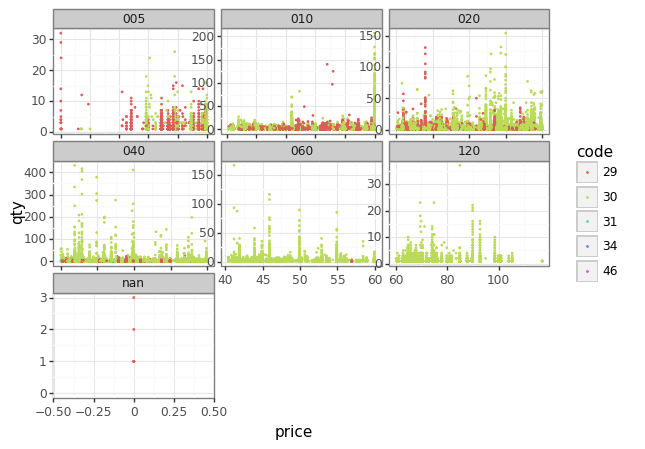

<ggplot: (8762505453463)>

In [74]:
(
    ggplot(df, aes('price', 'qty', color = 'code')) +
    gg.geom_point(size = 0.1) +
    gg.facet_wrap('~cat', scales = 'free') +
    gg.theme_bw()
)

In [76]:
cnt_rev2 = df.groupby(['week','cat'])['rev'].sum().reset_index()
cnt_rev2.head()

,week,cat,rev
0,2019-12-30,005,998.71
1,2019-12-30,010,14094.33
2,2019-12-30,020,38263.94
3,2019-12-30,040,73594.44
4,2019-12-30,060,23443.94


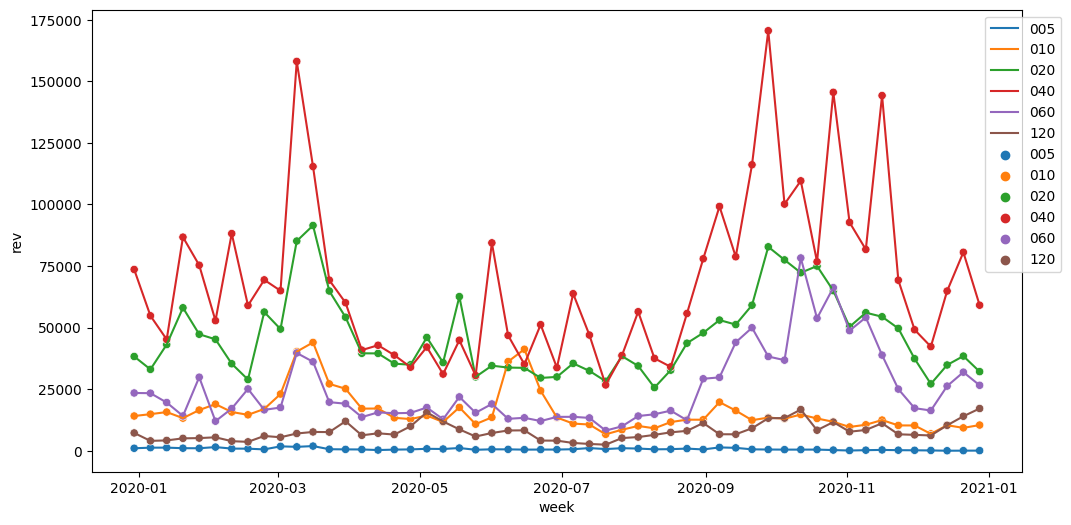

In [82]:
plt.figure(figsize = [12,6])
sns.lineplot(data = cnt_rev2, x = 'week', y = 'rev', hue = 'cat')
sns.scatterplot(data = cnt_rev2, x = 'week', y = 'rev', hue = 'cat')
plt.legend(bbox_to_anchor = [1.05,1])
plt.show()

# Iterators

In [83]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [84]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [85]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}